In [3]:
import pandas as pd
import numpy as np
import os
from google.colab import drive

### Mount the drive

In [4]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Research Practicum/Code & data/Original Option Data - dr. Borovkova/FUT_Option.xlsx'

Mounted at /content/drive


## Load the data

In [5]:
# Get the dataset
Gold = pd.read_excel(file_path)

# Catch dates
Gold['date'] = pd.to_datetime(Gold['date'])
Gold['futures_expiration_date'] = pd.to_datetime(Gold['futures_expiration_date'])
Gold['options_expiration_date'] = pd.to_datetime(Gold['options_expiration_date'], errors='coerce')

# Rescale
Gold['futures_close'] = Gold['futures_close']/1000000
Gold['strike'] = Gold['strike']/1000000
Gold['TTM'] = (Gold['futures_expiration_date'] - Gold['date']).dt.days / 365.25
# Gold['TTM'] = Gold['TTM'].clip(lower=0)

# Isolate puts
Gold_call = Gold[Gold['call_put'] == 'C']
Gold_put = Gold[Gold['call_put'] == 'P']

# Isolate calls
Gold_call.sort_values('date', inplace=True)
Gold_put.sort_values('date', inplace=True)

<ipython-input-5-ce212583d5ad>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gold_call.sort_values('date', inplace=True)
<ipython-input-5-ce212583d5ad>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Gold_put.sort_values('date', inplace=True)


In [ ]:
min_value = Gold['TTM'].min()
max_value = Gold['TTM'].max()

print("Minimum TTM value:", min_value)
print("Maximum TTM value:", max_value)

Minimum TTM value: 0.1998631074606434
Maximum TTM value: 5.6974674880219025


In [ ]:
Gold

,date,underlying,exchange,root_symbol,futures_symbol,futures_expiration_date,futures_close,options_expiration_date,strike,call_put,...,settlement,iv,iv_interpolated,volume,open_interest,delta,vega,gamma,theta,TTM
0,2019-10-15,GC,COMEX,OG3,GC/19Z.CX,2019-12-27,1483.500000,2019-10-18,1275.0,C,...,208600006.0,0.651953,0.651953,0,0,0.995230,1.864800e-02,0.000158,-0.191653,0.199863
1,2019-10-15,GC,COMEX,OG3,GC/19Z.CX,2019-12-27,1483.500000,2019-10-18,1275.0,P,...,0.1,0.632500,0.632500,0,0,-0.003793,1.519100e-02,0.000133,-0.160129,0.199863
2,2019-10-15,GC,COMEX,OG3,GC/19Z.CX,2019-12-27,1483.500000,2019-10-18,1280.0,C,...,203600006.0,0.636147,0.636147,0,0,0.995161,1.888500e-02,0.000164,-0.189547,0.199863
3,2019-10-15,GC,COMEX,OG3,GC/19Z.CX,2019-12-27,1483.500000,2019-10-18,1280.0,P,...,0.1,0.617910,0.617910,0,0,-0.003886,1.551700e-02,0.000139,-0.159877,0.199863
4,2019-10-15,GC,COMEX,OG3,GC/19Z.CX,2019-12-27,1483.500000,2019-10-18,1285.0,C,...,198600006.0,0.620342,0.620342,0,0,0.995092,1.912200e-02,0.000170,-0.187292,0.199863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,2019-10-15,GC,COMEX,GC,GC/25M.CX,2025-06-26,1595.900024,2025-05-27,2100.0,P,...,629000000.0,0.212622,0.212622,0,0,-0.674425,1.302783e+07,0.000674,-0.050989,5.697467
10774,2019-10-15,GC,COMEX,GC,GC/25M.CX,2025-06-26,1595.900024,2025-05-27,2125.0,C,...,144199997.0,0.211988,0.211988,0,0,0.375035,1.283431e+07,0.000529,-0.058506,5.697467
10775,2019-10-15,GC,COMEX,GC,GC/25M.CX,2025-06-26,1595.900024,2025-05-27,2125.0,P,...,651799988.0,0.215540,0.215540,0,0,-0.680822,1.303999e+07,0.000667,-0.051149,5.697467
10776,2019-10-15,GC,COMEX,GC,GC/25M.CX,2025-06-26,1595.900024,2025-05-27,2150.0,C,...,143000000.0,0.214597,0.214597,0,0,0.370127,1.278032e+07,0.000520,-0.059096,5.697467


In [ ]:
# Drop non-numeric columns if there are any
data = Gold_call.select_dtypes(include=[np.number])
mask = data['iv'] > 1000
data = data[~mask]
#data = data.reset_index(drop=True,inplace=True)
data

,futures_close,strike,bid,ask,settlement,iv,iv_interpolated,volume,open_interest,delta,vega,gamma,theta,TTM
0,1483.500000,1275.0,0.0,0.0,208600006.0,0.651953,0.651953,0,0,0.995230,1.864800e-02,0.000158,-0.191653,0.199863
7192,1520.000000,1675.0,0.0,0.0,64300003.0,0.169054,0.169054,0,0,0.353290,6.596541e+06,0.001239,-0.102311,1.535934
7190,1520.000000,1670.0,0.0,0.0,65300003.0,0.168484,0.168484,0,0,0.358061,6.627883e+06,0.001249,-0.102402,1.535934
7188,1520.000000,1665.0,0.0,0.0,66300003.0,0.167886,0.167886,0,0,0.362869,6.658375e+06,0.001259,-0.102463,1.535934
7186,1520.000000,1660.0,0.0,0.0,67300003.0,0.167254,0.167254,0,0,0.367712,6.687969e+06,0.001269,-0.102478,1.535934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,1500.400024,1530.0,54200001.0,55099998.0,54700001.0,0.146148,0.146148,0,81,0.454861,4.602492e+06,0.002336,-0.147159,0.698152
3582,1500.400024,1525.0,55700001.0,56599998.0,56200001.0,0.144951,0.144951,0,659,0.465559,4.614900e+06,0.002362,-0.146244,0.698152
3580,1500.400024,1520.0,57299999.0,58200001.0,57799999.0,0.143859,0.143859,0,141,0.476550,4.624173e+06,0.002384,-0.145329,0.698152
3596,1500.400024,1560.0,46000000.0,46900002.0,46599998.0,0.153054,0.153054,0,505,0.395529,4.472437e+06,0.002167,-0.150250,0.698152


In [ ]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
data_scaled = scaler.fit_transform(data)

# Preprocess the data
#scaler = MinMaxScaler((-1, 1))
#data_scaled = scaler.fit_transform(data)

In [ ]:
# Define the generator and discriminator models
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(100,)),
        layers.Dense(data_scaled.shape[1], activation='tanh')
    ])
    return model

def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(data_scaled.shape[1],)),
        layers.Dense(1, activation='sigmoid')
    ])
    return model




In [ ]:
import tensorflow as tf

# Define batch size and noise dimension
BATCH_SIZE = 128
NOISE_DIM = 75

# Define the generator and discriminator models
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(75,)),
        layers.Dense(data_scaled.shape[1], activation='tanh')
    ])
    return model

def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(data_scaled.shape[1],)),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Instantiate the models
generator = make_generator_model()
discriminator = make_discriminator_model()

# Define the loss and optimizers
cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam()
discriminator_optimizer = tf.keras.optimizers.Adam()

# Define the training loop

@tf.function
def train_step(real_data):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(noise, training=True)

        real_output = discriminator(real_data, training=True)
        fake_output = discriminator(generated_data, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = (cross_entropy(tf.ones_like(real_output), real_output) +
                     cross_entropy(tf.zeros_like(fake_output), fake_output))

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for data_batch in dataset:
            train_step(data_batch)
        print(f'\rEpoch {epoch + 1}/{epochs} completed', end = '', flush=True)  # Print the current epoch count
# Prepare the dataset
BUFFER_SIZE = 5389
BATCH_SIZE = 128
train_dataset = tf.data.Dataset.from_tensor_slices(data_scaled).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Train the GAN
train(train_dataset, epochs=5000)

Epoch 5000/5000 completed


In the context of training neural networks, particularly Generative Adversarial Networks (GANs), the terms BATCH_SIZE, NOISE_DIM, and BUFFER_SIZE have specific meanings:

BATCH_SIZE (256): This refers to the number of training examples used in one iteration of model training. In a dataset, data is usually divided into batches, and each batch is fed into the network one at a time. A batch size of 256 means that 256 data points from the dataset are used for each training step.

NOISE_DIM (100): This is specific to GANs, particularly the generator part of the GAN. It refers to the dimensionality of the random noise vector that is input into the generator network. A noise dimension of 100 means that the generator takes in a random vector of size 100 to generate data.

BUFFER_SIZE (60000): This is typically used with data loading and shuffling operations. It defines the size of the buffer used to shuffle the dataset. A larger buffer size ensures better randomization of data. In TensorFlow, for example, Dataset.shuffle(buffer_size) randomly shuffles the elements of the dataset. A buffer size of 60000 in this context would mean the dataset is shuffled using a buffer that can hold 60000 elements.

In [ ]:
# Generate random noise
num_examples_to_generate=200000
random_noise = tf.random.normal([num_examples_to_generate, NOISE_DIM])

# Use the generator to create images
simulated_data = generator(random_noise, training=False)

# If necessary, rescale the data to the original scale
# This step depends on how you've preprocessed your training data
simulated_data_rescaled = scaler.inverse_transform(simulated_data)

# Convert the generated data to a format you can use (e.g., Pandas DataFrame)
simulated_data_df = pd.DataFrame(simulated_data_rescaled, columns=data.columns)

This code replaces each TTM value in the generated data with the nearest TTM value from the original dataset. This approach keeps the diversity of generated data while ensuring that TTM values align with realistic, observed values.

In [ ]:
# Convert simulated TTM values to daily.
# Desired step for quantization
# DAILY
step_daily = 0.00273785078
# WEEKLY
step_weekly = 0.14285714285

# Quantize TTM values to the nearest multiple of the step
simulated_data_df['TTM'] = (np.round(simulated_data_df['TTM'] / step_weekly) * step_weekly).astype(float)


# Convert the original TTM values into a KDTree for efficient nearest neighbor search
#original_TTM_tree = cKDTree(np.array(data['TTM']).reshape(-1, 1))

# Replace generated TTM values with nearest original TTM values
#generated_TTM_values = simulated_data_df['TTM']
#nearest_indices = original_TTM_tree.query(generated_TTM_values.values.reshape(-1, 1))[1]
#simulated_data_df['TTM'] = np.array(data['TTM'])[nearest_indices]

# Convert the original future_close values into a KDTree for efficient nearest neighbor search
#original_TTM_tree = cKDTree(np.array(data['futures_close']).reshape(-1, 1))

# Replace generated future_close values with nearest original future_close values
#generated_TTM_values = simulated_data_df['futures_close']
#nearest_indices = original_TTM_tree.query(generated_TTM_values.values.reshape(-1, 1))[1]
#simulated_data_df['futures_close'] = np.array(data['futures_close'])[nearest_indices]

In [ ]:
# Assuming simulated_data_df is your DataFrame and it has a column named 'strike'
accuracy = 5000000
simulated_data_df['strike'] = (simulated_data_df['strike'] / accuracy).round() * accuracy
simulated_data_df['Moneyness'] = simulated_data_df['strike']/simulated_data_df['futures_close']

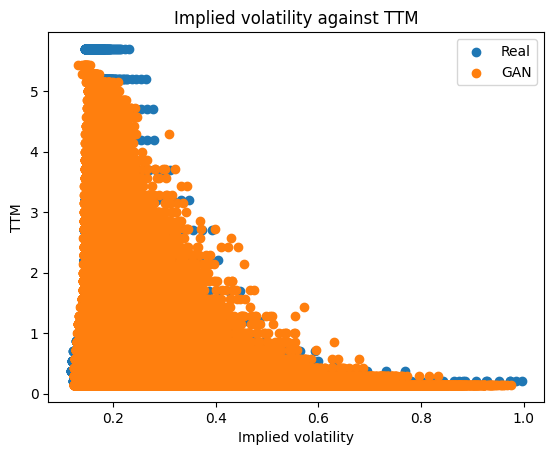

In [ ]:
plt.scatter(data['iv'], data['TTM'], label = "Real")
plt.scatter(simulated_data_df['iv'], simulated_data_df['TTM'], label = "GAN")
plt.title("Implied volatility against TTM")
plt.xlabel("Implied volatility")
plt.ylabel("TTM")
plt.legend()

In [ ]:
data

,futures_close,strike,bid,ask,settlement,iv,iv_interpolated,volume,open_interest,delta,vega,gamma,theta,TTM
0,1483.500000,1275.0,0.0,0.0,208600006.0,0.651953,0.651953,0,0,0.995230,1.864800e-02,0.000158,-0.191653,0.199863
7192,1520.000000,1675.0,0.0,0.0,64300003.0,0.169054,0.169054,0,0,0.353290,6.596541e+06,0.001239,-0.102311,1.535934
7190,1520.000000,1670.0,0.0,0.0,65300003.0,0.168484,0.168484,0,0,0.358061,6.627883e+06,0.001249,-0.102402,1.535934
7188,1520.000000,1665.0,0.0,0.0,66300003.0,0.167886,0.167886,0,0,0.362869,6.658375e+06,0.001259,-0.102463,1.535934
7186,1520.000000,1660.0,0.0,0.0,67300003.0,0.167254,0.167254,0,0,0.367712,6.687969e+06,0.001269,-0.102478,1.535934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3584,1500.400024,1530.0,54200001.0,55099998.0,54700001.0,0.146148,0.146148,0,81,0.454861,4.602492e+06,0.002336,-0.147159,0.698152
3582,1500.400024,1525.0,55700001.0,56599998.0,56200001.0,0.144951,0.144951,0,659,0.465559,4.614900e+06,0.002362,-0.146244,0.698152
3580,1500.400024,1520.0,57299999.0,58200001.0,57799999.0,0.143859,0.143859,0,141,0.476550,4.624173e+06,0.002384,-0.145329,0.698152
3596,1500.400024,1560.0,46000000.0,46900002.0,46599998.0,0.153054,0.153054,0,505,0.395529,4.472437e+06,0.002167,-0.150250,0.698152


In [ ]:
simulated_data_df

,futures_close,strike,bid,ask,settlement,iv,iv_interpolated,volume,open_interest,delta,vega,gamma,theta,TTM,Moneyness
0,1568.205254,0.0,0.000000e+00,0.000000e+00,2.718606e+08,0.155141,0.155173,0.000000,0.000000,0.722141,9.810397e+06,0.000826,-0.010686,4.142857,0.0
1,1493.462013,0.0,2.429067e+07,3.473683e+07,2.523811e+07,0.161930,0.162356,4.504438,196.459909,0.286245,2.561360e+06,0.003003,-0.010686,0.428571,0.0
2,1556.521120,0.0,0.000000e+00,0.000000e+00,1.647270e+08,0.150067,0.150817,0.000000,0.199277,0.556877,1.039494e+07,0.000889,-0.010686,3.428571,0.0
3,1492.475167,0.0,0.000000e+00,0.000000e+00,4.056306e+08,0.310910,0.321324,0.000000,331.239348,0.984951,1.514700e-02,0.000358,-0.010686,0.428571,0.0
4,1504.313021,0.0,0.000000e+00,0.000000e+00,3.139542e+08,0.179425,0.180469,0.000000,3.654948,0.954019,1.423910e+06,0.000427,-0.010686,0.857143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1483.500000,0.0,0.000000e+00,0.000000e+00,5.544767e+08,0.547071,0.594113,0.000000,0.000000,0.990326,1.514700e-02,0.000020,-0.010686,0.142857,0.0
199996,1550.846214,0.0,0.000000e+00,0.000000e+00,8.879250e+07,0.220635,0.226220,0.000000,13.311175,0.318032,8.824558e+06,0.000593,-0.010686,3.142857,0.0
199997,1520.697539,0.0,0.000000e+00,0.000000e+00,2.081863e+08,0.148013,0.148374,0.000000,0.431615,0.772157,5.078641e+06,0.001122,-0.010686,1.571429,0.0
199998,1500.594787,0.0,9.495363e+07,7.812906e+07,8.552164e+07,0.132126,0.132583,0.833062,87.569076,0.640215,3.927626e+06,0.002688,-0.010686,0.714286,0.0


In [ ]:
simulated_data_df['Moneyness'].value_counts()

0.0    200000
Name: Moneyness, dtype: int64

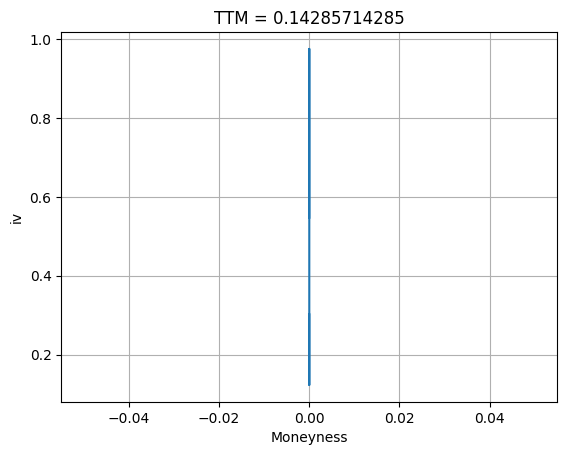

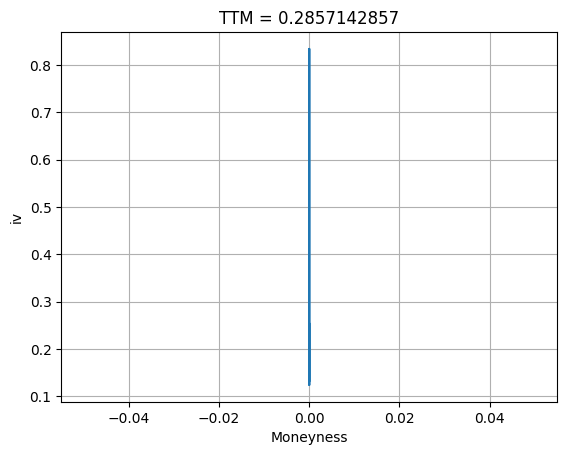

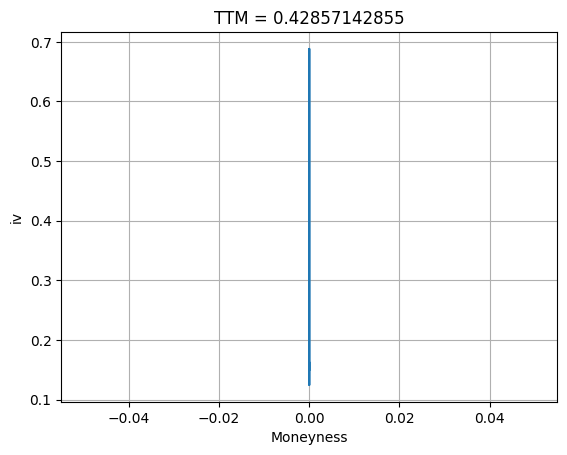

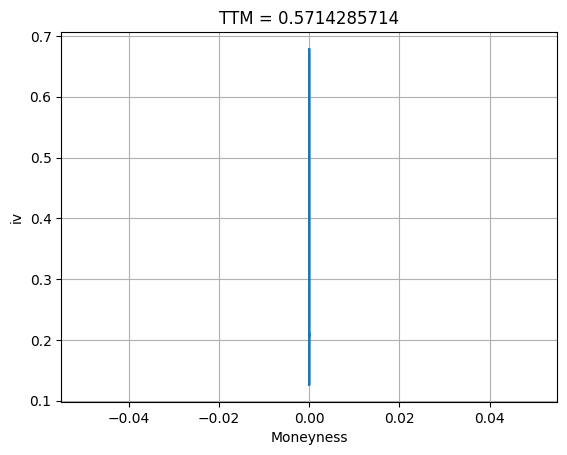

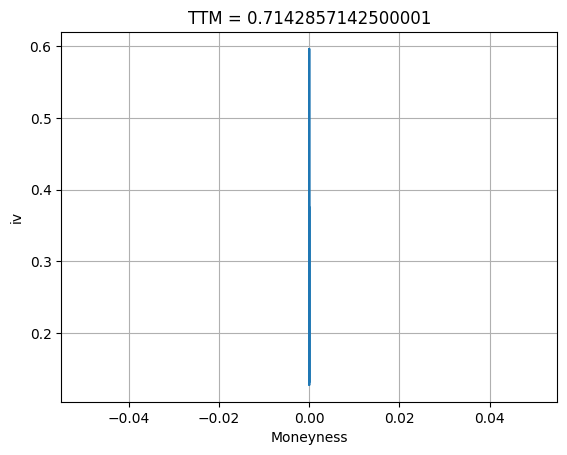

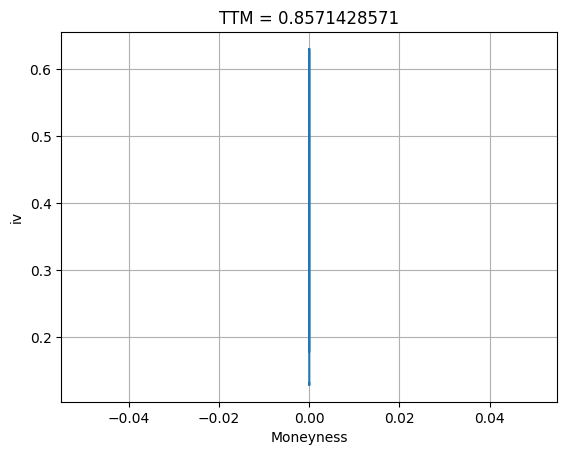

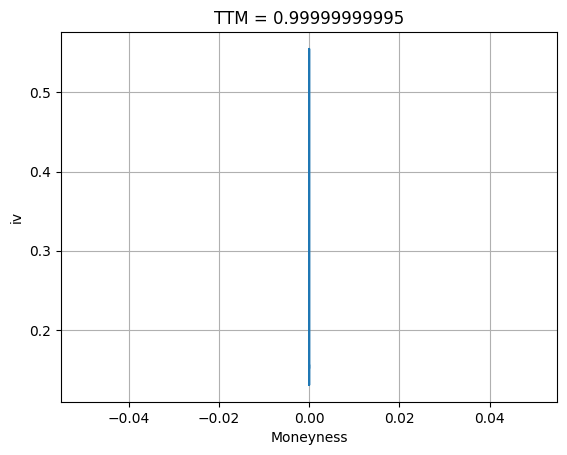

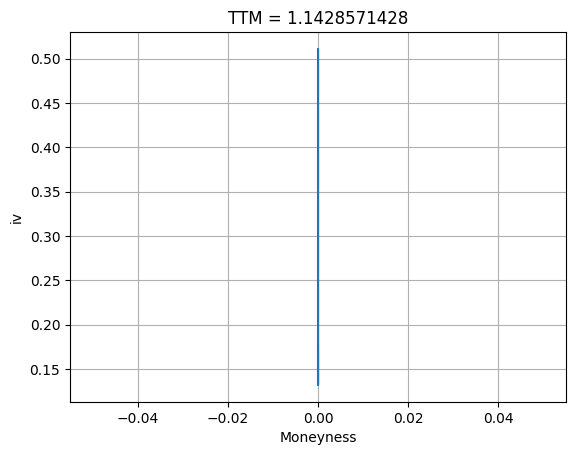

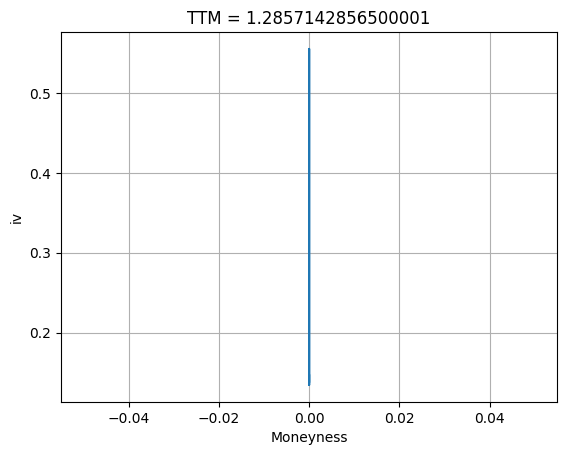

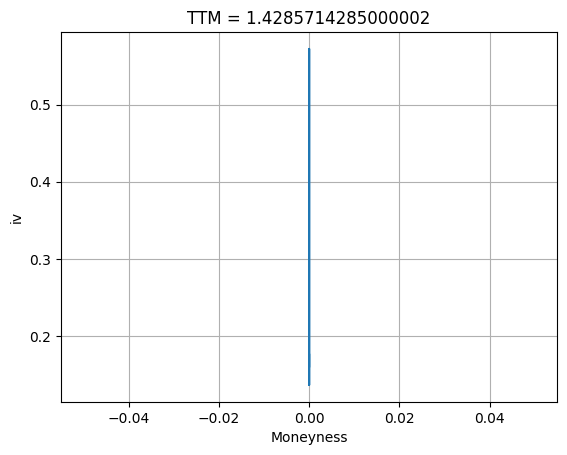

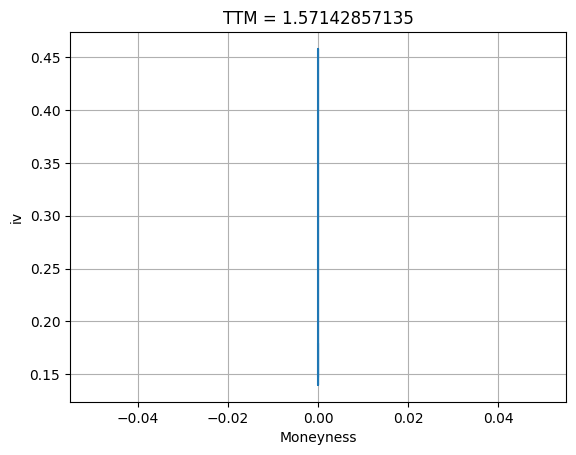

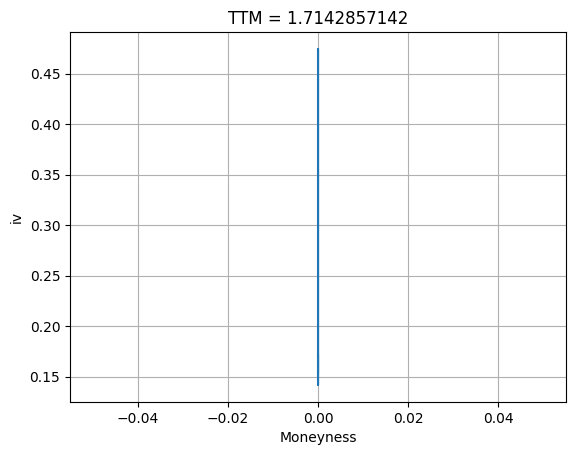

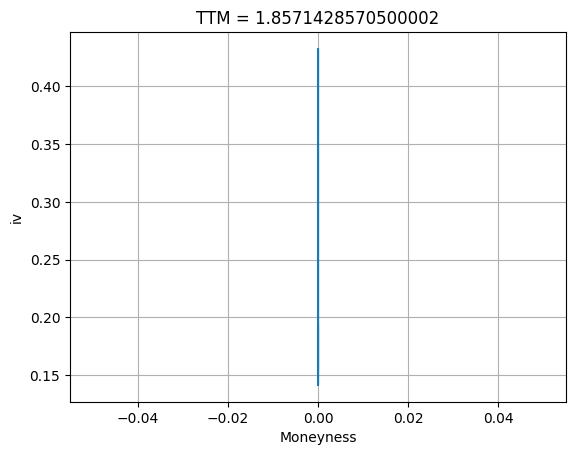

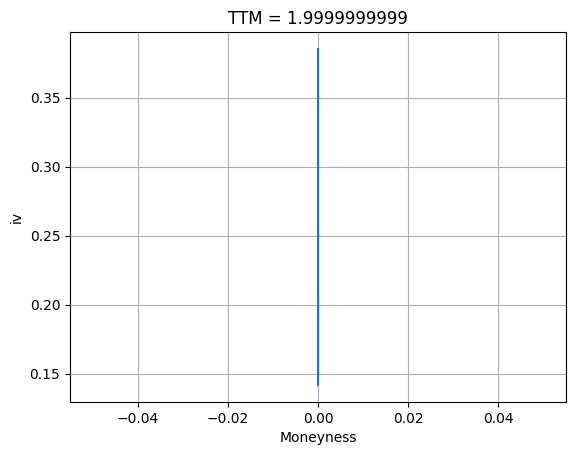

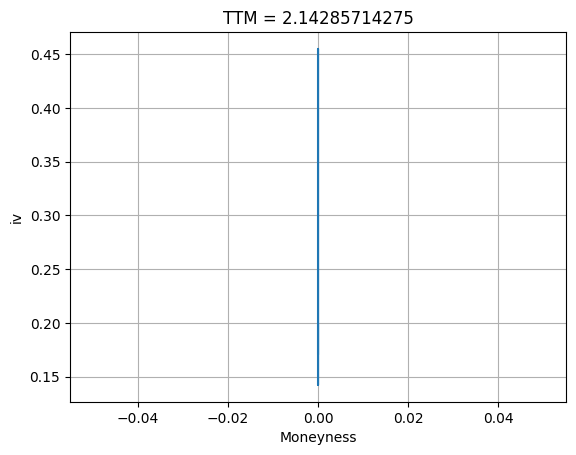

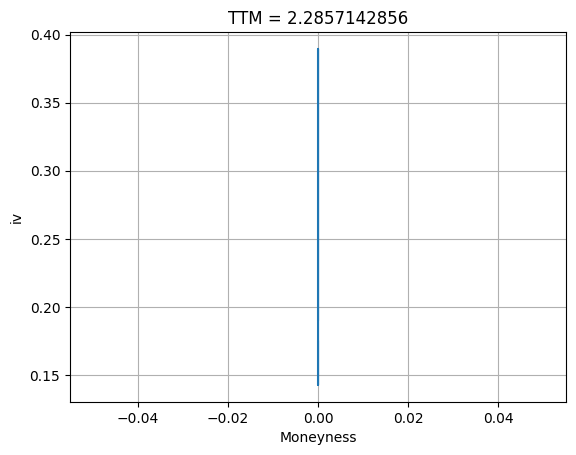

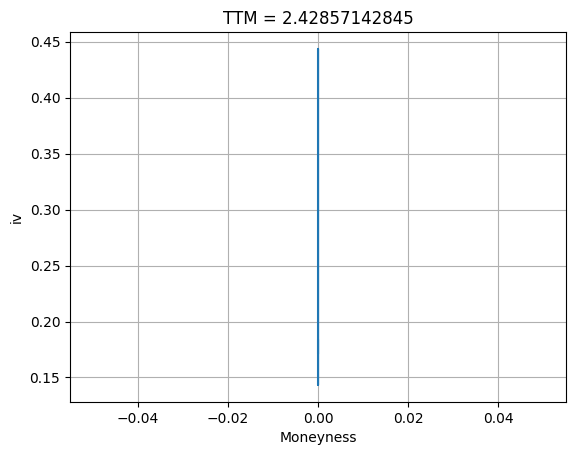

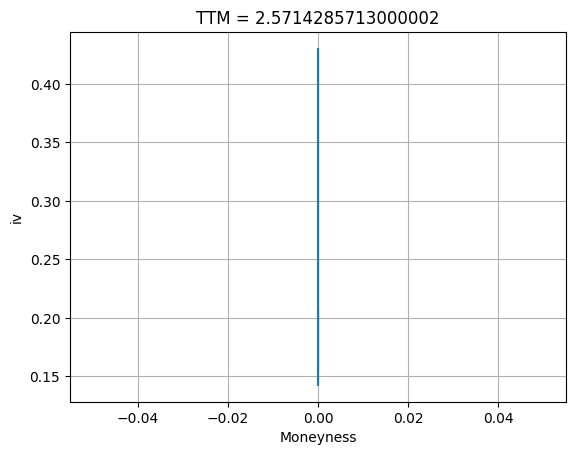

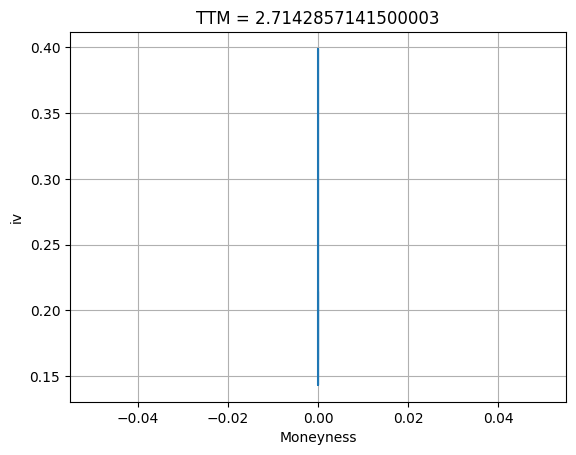

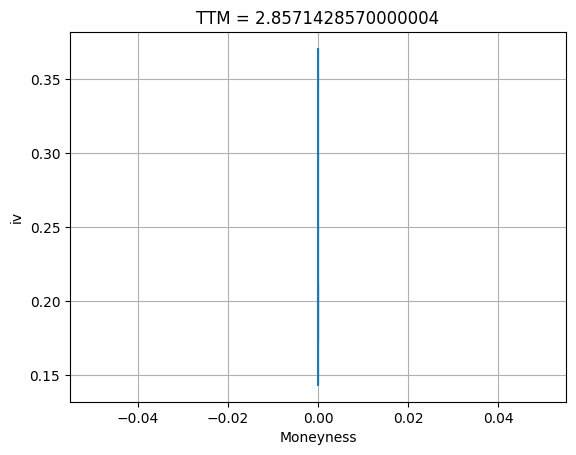

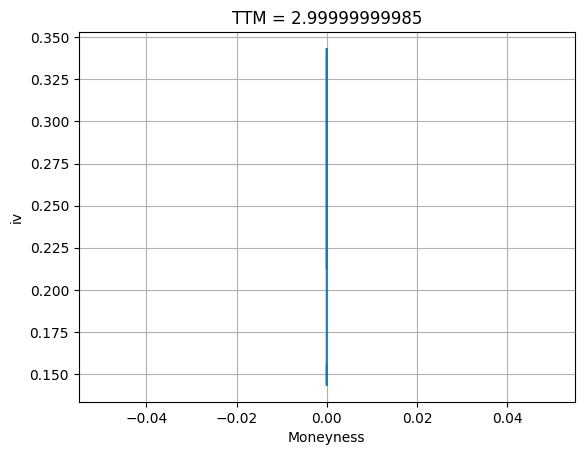

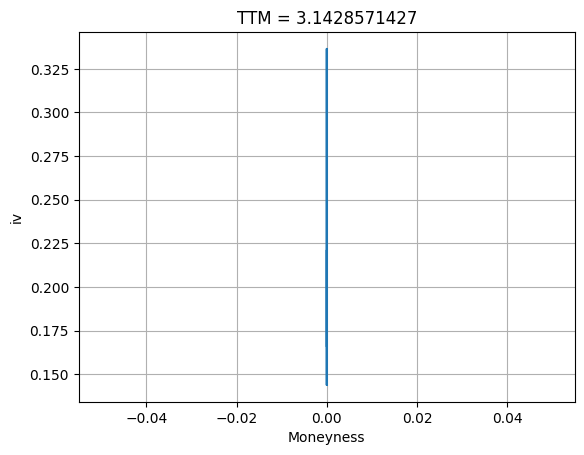

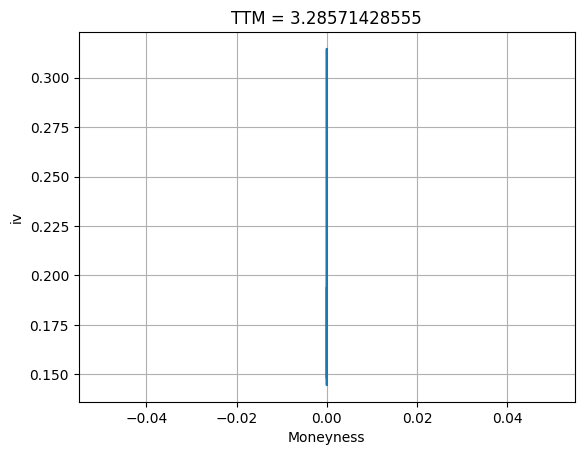

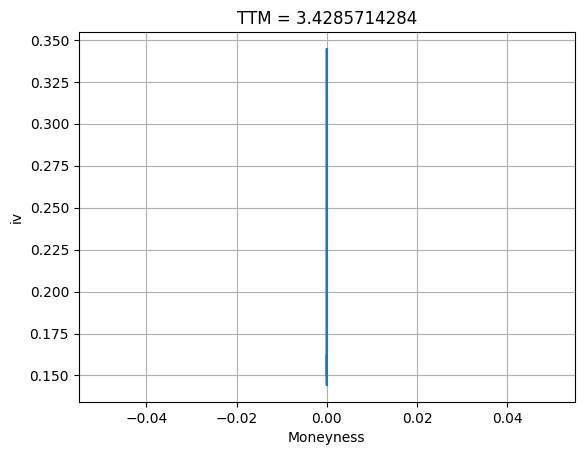

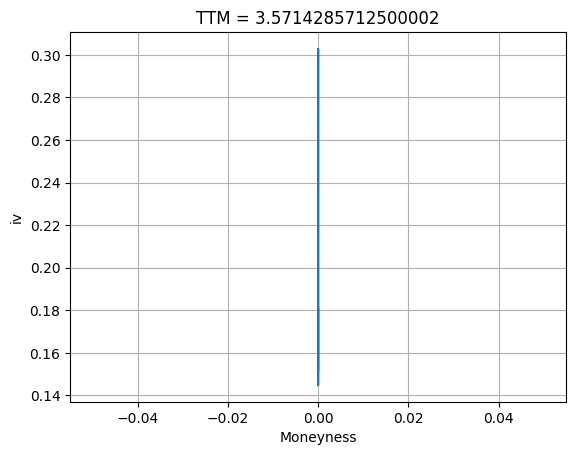

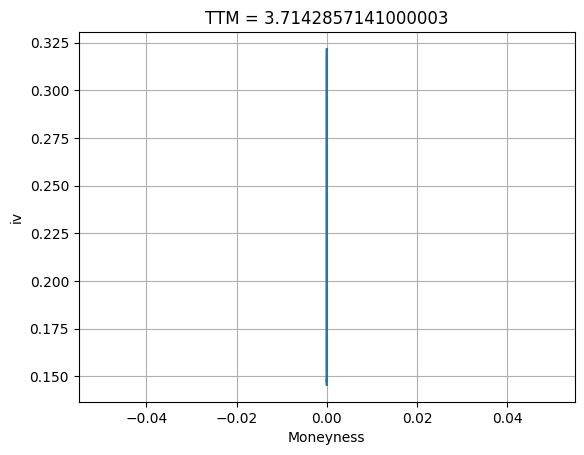

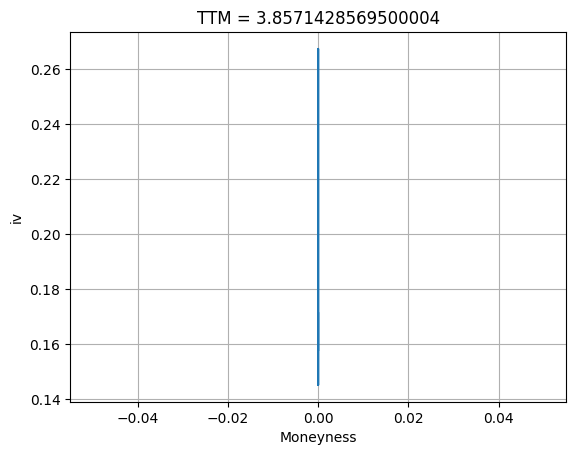

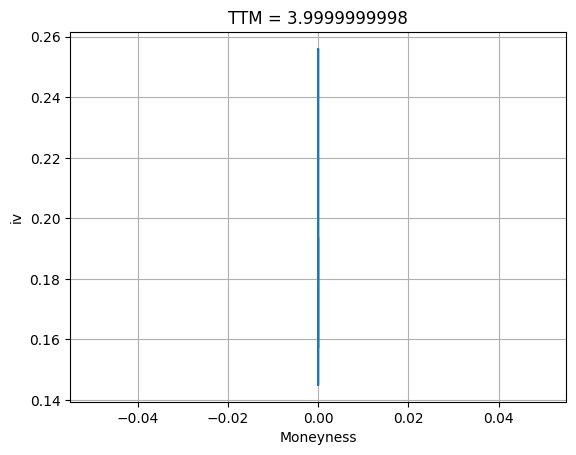

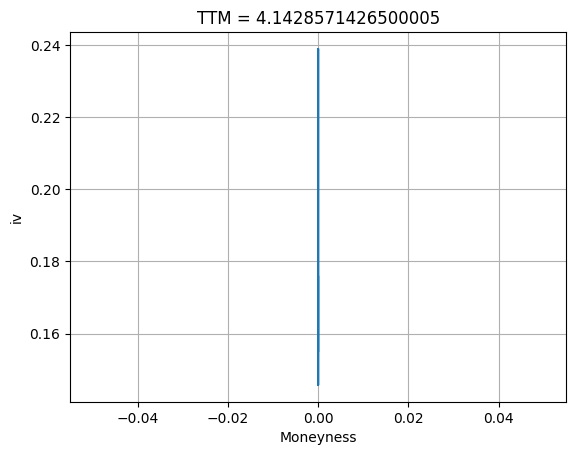

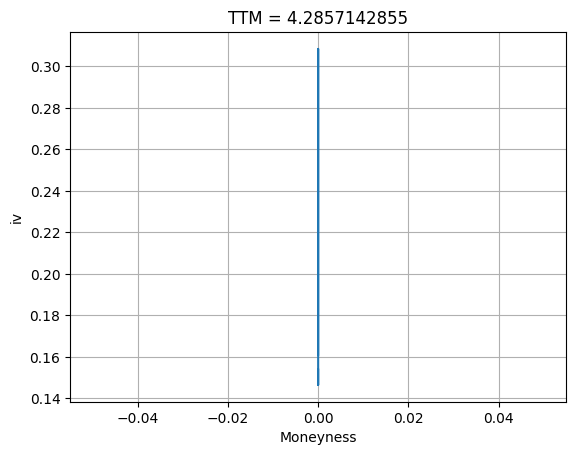

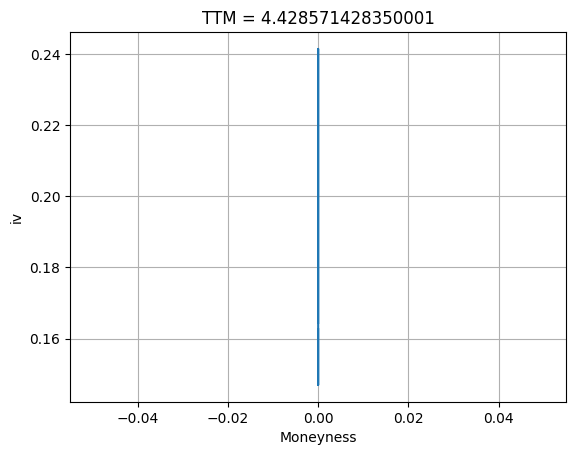

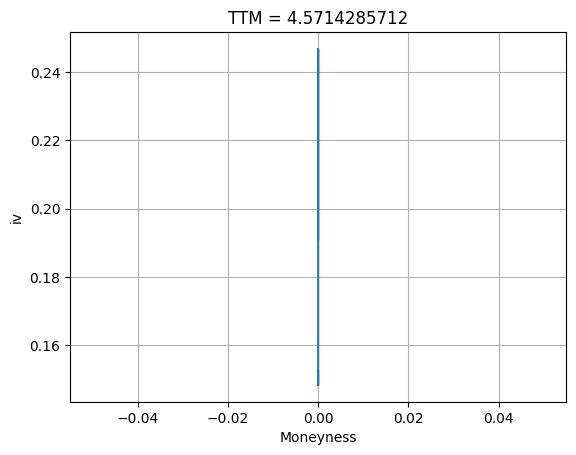

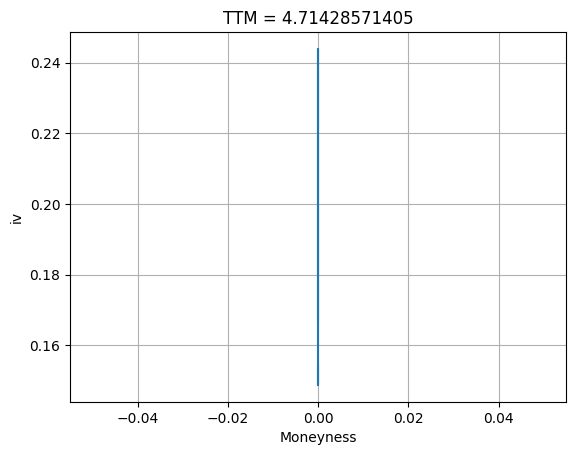

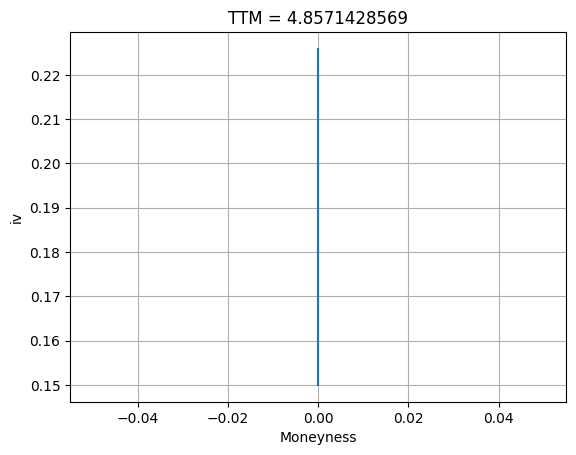

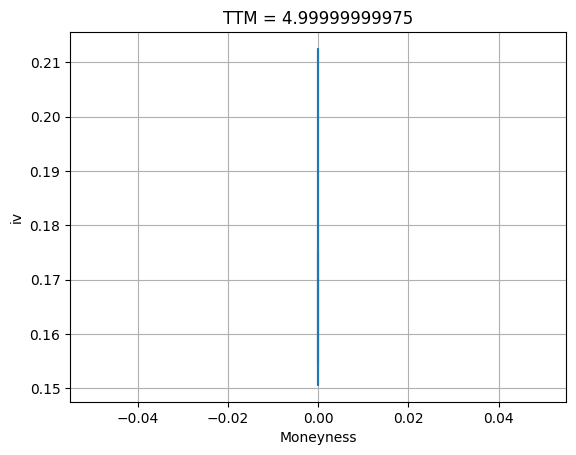

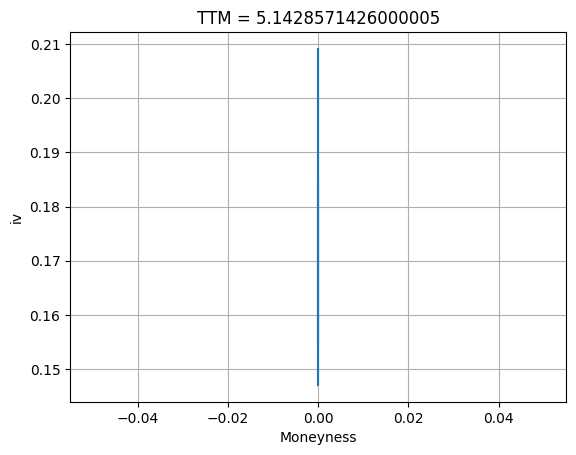

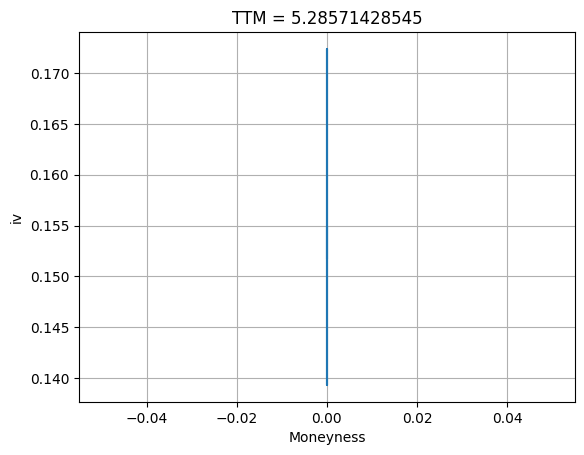

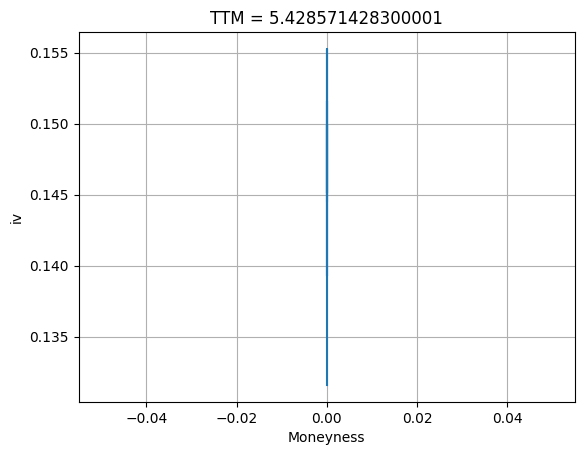

In [ ]:
unique_ttms = sorted(simulated_data_df['TTM'].unique())

# Plot 'IV' against 'Moneyness' for each 'TTM'
for ttm in unique_ttms:
    subset = simulated_data_df[simulated_data_df['TTM'] == ttm]
    subset_sorted = subset.sort_values(by='Moneyness')  # Ensure sorting is done within the loop, for each subset
    plt.figure()
    plt.plot(subset_sorted['Moneyness'], subset_sorted['iv'])  # Add markers for clarity
    plt.title(f'TTM = {ttm}')
    plt.xlabel('Moneyness')
    plt.ylabel('iv')
    plt.grid(True)  # Optionally add a grid
#    save_path = os.path.join(r"C:\Users\jesper\Documents\FinTech\Research Project\plots", f'TTM_{ttm}.png')
#    plt.savefig(save_path)
    plt.show()  # Show plot for each TTM value

# Remove plt.tight_layout() as it is not needed when showing plots one by one

In [ ]:
# Fit a polynomial of degree n (e.g., n=3 for cubic)
n = 6

for ttm in unique_ttms:
    subset = simulated_data_df[simulated_data_df['TTM'] == ttm]
    subset_sorted = subset.sort_values(by='Moneyness')


    coefficients = np.polyfit(subset_sorted['Moneyness'], subset_sorted['iv'], n)
# Create a polynomial function with the obtained coefficients
    polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial curve
    x_values = np.linspace(subset_sorted['Moneyness'].min(), subset_sorted['Moneyness'].max(), 100)

# Plot the original data and the fitted polynomial curve
    plt.figure()
    plt.scatter(subset_sorted['Moneyness'], subset_sorted['iv'], label='Original Data', s = 5)
    plt.plot(x_values, polynomial(x_values), color='red', label=f'{n}-degree Polynomial Fit')
    plt.title(f'Volatility Smile with Polynomial Fit of TTM = {ttm}')
    plt.xlabel('Moneyness')
    plt.ylabel('IV')
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


SystemError: <class 'numpy.linalg.LinAlgError'> returned a result with an exception set

simulated_data_df['futures_close'] = (simulated_data_df['futures_close'] / accuracy).round() * accuracy
unique_combinations = simulated_data_df[['TTM', 'futures_close']].drop_duplicates()
kurtosis = []
skewness = []
labels = []
for index, row in unique_combinations.iterrows():
    specific_expiration_date = row['TTM']
    specific_future_close = row['futures_close']
    
    # Filter data for the specific combination
    specific_conditions = (simulated_data_df['TTM'] == specific_expiration_date) & (simulated_data_df['futures_close'] == specific_future_close)
    filtered_data = simulated_data_df[specific_conditions]
    
    sorted_data = filtered_data.sort_values(by='Moneyness')
    kurtosis_value = filtered_data['iv'].kurtosis()
    if kurtosis_value <20:
        kurtosis.append(kurtosis_value)
        labels.append(f'{specific_expiration_date} - {specific_future_close}')
        skewness.append(filtered_data['iv'].skew())
    plt.figure()
    plt.plot(sorted_data['Moneyness'], sorted_data['iv'])
    plt.title(f'Implied Volatility vs Moneyness\nExpiration Date: {specific_expiration_date}, Future Close: {specific_future_close}')
    plt.xlabel('Moneyness')
    plt.ylabel('Implied Volatility')
    plt.grid(True)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)  # First subplot
plt.hist(simulated_data_df['strike'], bins=30, color='blue', alpha=0.7)
plt.title('GAN')
plt.xlabel('Strike Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Second subplot
plt.hist(data['strike'], bins=30, color='orange', alpha=0.7)
plt.title('Real')
plt.xlabel('Strike Price')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)  # First subplot
plt.hist(simulated_data_df['TTM'], bins=60, color='blue', alpha=0.7)
plt.title('GAN')
plt.xlabel('TTM')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Second subplot
plt.hist(data['TTM'], bins=60, color='orange', alpha=0.7)
plt.title('Real')
plt.xlabel('TTM')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plt.subplot(1, 2, 1)  # First subplot
plt.hist(simulated_data_df['iv'], bins=30, color='blue', alpha=0.7)
plt.title('GAN')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  # Second subplot
plt.hist(data['iv'], bins=30, color='orange', alpha=0.7)
plt.title('Real')
plt.xlabel('Implied Volatility')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
simulated_data_df['TTM']